In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('cluster_example_data.csv')

In [5]:
data

,size,age,id
0,34,5,0
1,25,5,1
2,30,2,2
3,38,20,3
4,44,12,4
5,48,18,5
6,52,22,6
7,60,19,7
8,34,18,8
9,34,22,9


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

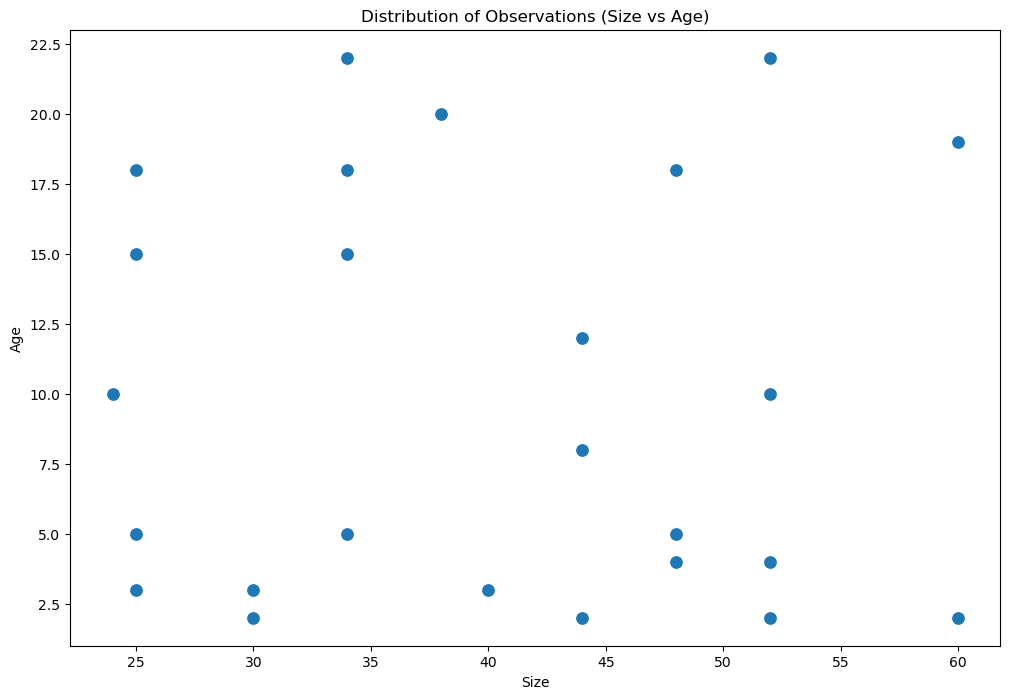

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='size', y='age', palette='viridis', s=100)
plt.title('Distribution of Observations (Size vs Age)')
plt.xlabel('Size')
plt.ylabel('Age')
plt.show()

In [13]:
# Extract only 'size' and 'age' columns for clustering
data_for_clustering = data[['size', 'age']]

In [15]:
from sklearn.cluster import KMeans

In [94]:
kmeans = KMeans(n_clusters=4) # KMeans 알고리즘 생성 ## k 지정 (찾고자 하는 군집의 수)

In [96]:
clusters = kmeans.fit_predict(data_for_clustering)   ## 군집화 분석

In [97]:
clusters

array([2, 2, 2, 3, 1, 1, 1, 1, 3, 3, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1, 3,
       1, 1, 1, 1])

In [98]:
data['cluster'] = clusters

In [102]:
data

,size,age,id,cluster
0,34,5,0,2
1,25,5,1,2
2,30,2,2,2
3,38,20,3,3
4,44,12,4,1
5,48,18,5,1
6,52,22,6,1
7,60,19,7,1
8,34,18,8,3
9,34,22,9,3


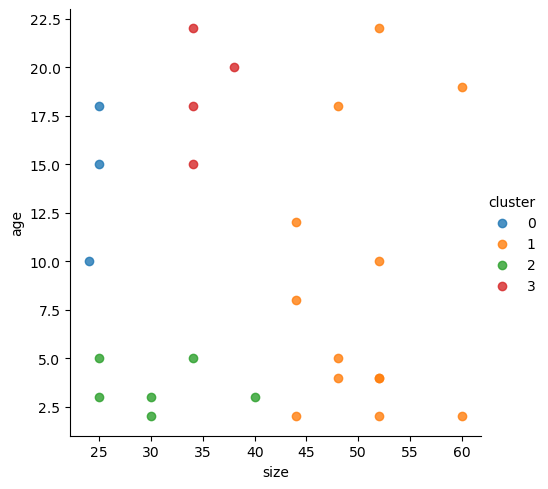

In [104]:
# 군집화 결과 시각화

sns.lmplot(x='size', y='age', data=data, hue='cluster',fit_reg=False )

plt.show()

In [106]:
## 실루엣 스코어를 활용한 k 정하기 (2에서 실루엣 스코어가 가장 1에 가까움)
from sklearn.metrics import silhouette_score
for k in range(2,8):
    kmeans = KMeans(n_clusters=k)
    cluster = kmeans.fit_predict(data_for_clustering) 
    print(k, silhouette_score(data_for_clustering, cluster))

## 근데 k를 4로 하는 게 더 적절해 보임 (그림상)
## 실루엣 스코어는 절대적인 것이 아니라 참고용일뿐, 그림을 보고 적절히 선택해야 함

2 0.4767950237806064
3 0.4113110756895919
4 0.4765732552945714
5 0.4273190443623125
6 0.42645286133989563
7 0.38109925580198745


### [참고] 관측치 ID를 이용해서 군집화 결과 시각화 하기

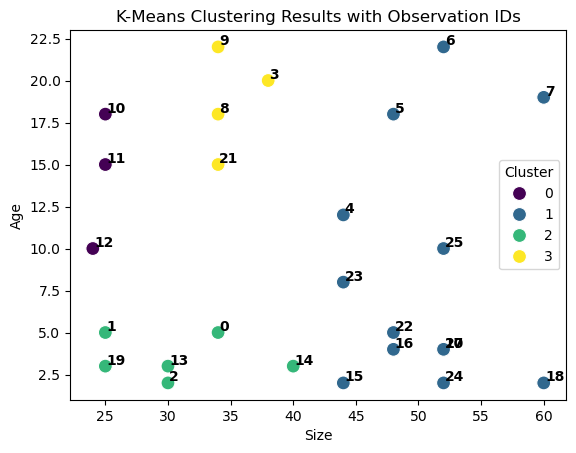

In [109]:
# Plot the clustering results with observation IDs from the 'id' column
scatter = sns.scatterplot(data=data, x='size', y='age', hue='cluster', palette='viridis', s=100)

# Add text labels
for i in range(data.shape[0]):
    scatter.text(data['size'][i] + 0.1, data['age'][i] + 0.1, data['id'][i], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('K-Means Clustering Results with Observation IDs')
plt.xlabel('Size')
plt.ylabel('Age')
plt.legend(title='Cluster', loc='right')
plt.show()